In [71]:
import pandas as pd
import numpy as np

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv("covid_data.csv")
data.head()

date day_of_week count_tests count_cases total_not_positive  \
0   3/1/2020      Sunday           1           0                  1   
1   5/2/2020    Saturday       2,431         705              1,726   
2  5/14/2020    Thursday       4,098         772              3,326   
3   3/5/2020    Thursday          17           1                 16   
4   3/6/2020      Friday          18           3                 15   

   ages_0_17 ages_18_29 ages_30_39  ages_40_49  ages_50_59  ...  \
0          0          0          1           0           0  ...   
1        129        470        458         458         412  ...   
2        260        805        833         685         604  ...   
3          4          2          0           4           3  ...   
4          1          5          1           3           3  ...   

   not_positive_age_unknown  not_positive_female  not_positive_male  \
0                         0                    0                  1   
1                         1                  898                797   
2                        16                1,654              1,424   
3                         0                    7                  9   
4                         1                    8                  7   

   not_positive_gender_unknown not_positive_latinx  \
0                            0                   0   
1                           31                 226   
2                          248                 529   
3                            0                   2   
4                            0                   2   

  not_positive_asian_non_latinx  not_positive_black_non_latinx  \
0                             0                              0   
1                            30                            273   
2                            43                            430   
3                             0                              4   
4                             0                              1   

  not_positive_white_non_latinx  not_positive_other_race_non_latinx  \
0                             1                                   0   
1                           225                                  51   
2                           442                                 109   
3                             2                                   1   
4                             2                                   1   

   not_positive_unknown_race_ethnicity  
0                                    0  
1                                  921  
2                                1,773  
3                                    7  
4                                    9  

[5 rows x 59 columns]

In [76]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 59 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   date                                 88 non-null     object
 1   day_of_week                          88 non-null     object
 2   count_tests                          89 non-null     object
 3   count_cases                          89 non-null     object
 4   total_not_positive                   89 non-null     object
 5   ages_0_17                            89 non-null     int64 
 6   ages_18_29                           89 non-null     object
 7   ages_30_39                           89 non-null     object
 8   ages_40_49                           89 non-null     int64 
 9   ages_50_59                           89 non-null     int64 
 10  ages_60_69                           89 non-null     int64 
 11  ages_70_79                           89 non-nul

In [60]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')

In [61]:
data['Cases'] = pd.to_numeric(data['Cases'])     
data['Tests'] = pd.to_numeric(data['Tests'])

In [62]:
data_numeric = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

<Figure size 1440x720 with 0 Axes>

In [63]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)

The linear model is: Y = 97.777 + 0.18572X


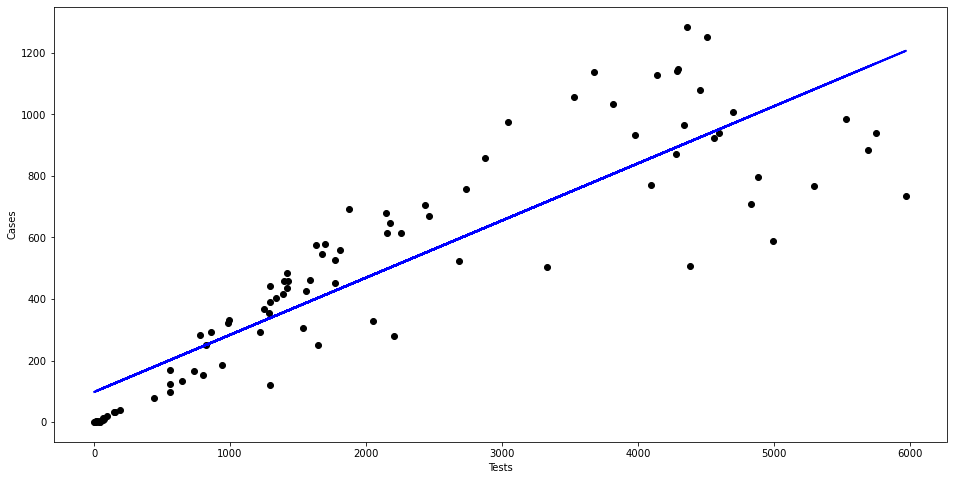

In [64]:
reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

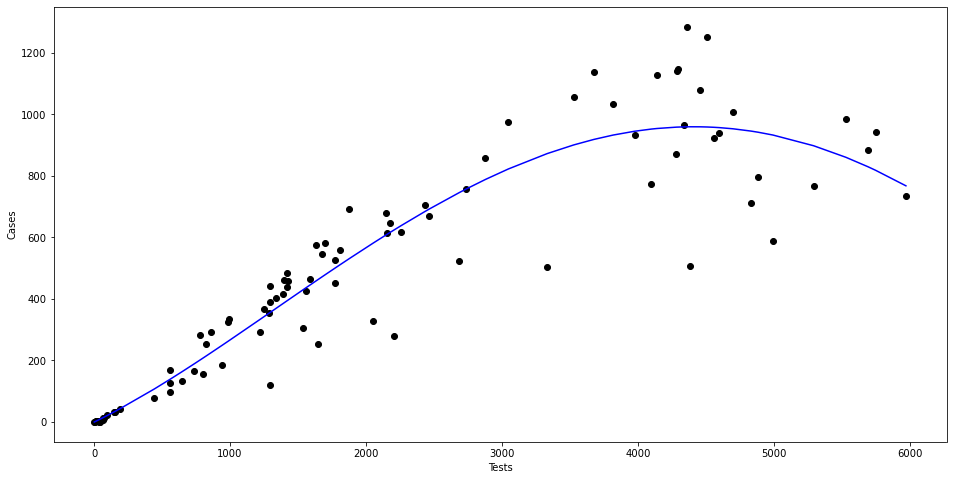

In [65]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()